In [2]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/rc-dbe/bigdatacertification/master/dataset/churn_trasnsformed_new.csv'
df_csv = pd.read_csv(url, sep=',',)
df_csv.head()


,Unnamed: 0,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,...,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,1,1,...,0,1,0,1,0,0,1,2985,2985.0,0
1,1,1,0,0,1,1,0,0,1,34,...,1,0,1,0,0,1,0,5695,18895.0,0
2,2,1,0,0,1,1,0,0,1,2,...,0,1,0,1,0,1,0,5385,10815.0,1
3,3,1,0,0,1,1,0,0,1,45,...,1,0,1,0,0,1,1,423,184075.0,0
4,4,0,1,0,1,1,0,0,1,2,...,0,1,0,1,0,0,1,707,15165.0,1


In [4]:
df = df_csv.drop("Unnamed: 0", axis=1)
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender_0            7043 non-null   int64  
 1   gender_1            7043 non-null   int64  
 2   SeniorCitizen_0     7043 non-null   int64  
 3   SeniorCitizen_1     7043 non-null   int64  
 4   Partner_0           7043 non-null   int64  
 5   Partner_1           7043 non-null   int64  
 6   Dependents_0        7043 non-null   int64  
 7   Dependents_1        7043 non-null   int64  
 8   tenure              7043 non-null   int64  
 9   PhoneService_0      7043 non-null   int64  
 10  PhoneService_1      7043 non-null   int64  
 11  MultipleLines_0     7043 non-null   int64  
 12  MultipleLines_1     7043 non-null   int64  
 13  MultipleLines_2     7043 non-null   int64  
 14  InternetService_0   7043 non-null   int64  
 15  InternetService_1   7043 non-null   int64  
 16  Intern

In [5]:
from sklearn.preprocessing import MinMaxScaler
# initialize min-max scaler
mm_scaler = MinMaxScaler()
column_names = df.columns.tolist()
column_names.remove('Churn')
df[column_names] = mm_scaler.fit_transform(df[column_names])
df.sort_index(inplace=True)
df.head()


,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,...,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges,Churn
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.013889,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.250169,0.003420,0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.472222,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.478745,0.021766,0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.027778,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.452598,0.012449,1
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.625000,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.034076,0.212235,0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.027778,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.058030,0.017465,1


In [6]:
feature = ['Churn']
train_feature = df.drop(feature, axis=1)
train_target = df["Churn"]
train_feature.head(5)


,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,...,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.013889,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.250169,0.003420
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.472222,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.478745,0.021766
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.027778,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.452598,0.012449
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.625000,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.034076,0.212235
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.027778,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.058030,0.017465


In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_feature ,train_target, shuffle = True, test_size=0.3, random_state=1)
X_train.head()


,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,...,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges
5925,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.277778,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.056343,0.016308
4395,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.958333,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.875169,0.085848
1579,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.166667,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.676957,0.010935
1040,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.194444,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.761302,0.014578
1074,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.013889,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.016194,0.000221


In [8]:
from sklearn.neural_network import MLPClassifier

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(5), activation = 'relu', solver = 'adam',max_iter= 10000, verbose = True)
mlp = mlp.fit(X_train,y_train)
# Prediction to Test Dataset
y_predmlp = mlp.predict(X_test)


Iteration 1, loss = 0.55252017
Iteration 2, loss = 0.52237818
Iteration 3, loss = 0.50566385
Iteration 4, loss = 0.49249651
Iteration 5, loss = 0.48181528
Iteration 6, loss = 0.47156934
Iteration 7, loss = 0.46384786
Iteration 8, loss = 0.45792289
Iteration 9, loss = 0.45423952
Iteration 10, loss = 0.45167248
Iteration 11, loss = 0.44991718
Iteration 12, loss = 0.44789469
Iteration 13, loss = 0.44665798
Iteration 14, loss = 0.44542567
Iteration 15, loss = 0.44432453
Iteration 16, loss = 0.44328727
Iteration 17, loss = 0.44247046
Iteration 18, loss = 0.44143734
Iteration 19, loss = 0.44079214
Iteration 20, loss = 0.43994423
Iteration 21, loss = 0.43914680
Iteration 22, loss = 0.43866862
Iteration 23, loss = 0.43783257
Iteration 24, loss = 0.43721219
Iteration 25, loss = 0.43678138
Iteration 26, loss = 0.43629214
Iteration 27, loss = 0.43572390
Iteration 28, loss = 0.43517812
Iteration 29, loss = 0.43501409
Iteration 30, loss = 0.43405636
Iteration 31, loss = 0.43378835
Iteration 32, los

In [10]:
print('Number of Layer =', mlp.n_layers_)
print('Number of Iteration =', mlp.n_iter_)
print('Current loss computed with the loss function =', mlp.loss_)


Number of Layer = 3
Number of Iteration = 193
Current loss computed with the loss function = 0.4156335028240221


In [12]:
from sklearn import metrics

In [13]:
cnf_matrixmlp = metrics.confusion_matrix(y_test, y_predmlp)
cnf_matrixmlp


array([[1406,  179],
       [ 231,  297]], dtype=int64)

In [14]:
acc_mlp = metrics.accuracy_score(y_test, y_predmlp)
prec_mlp = metrics.precision_score(y_test, y_predmlp)
rec_mlp = metrics.recall_score(y_test, y_predmlp)
f1_mlp = metrics.f1_score(y_test, y_predmlp)
kappa_mlp = metrics.cohen_kappa_score(y_test, y_predmlp)


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [20]:
cnf_matrix = confusion_matrix(y_test, y_predmlp)

<Axes: >

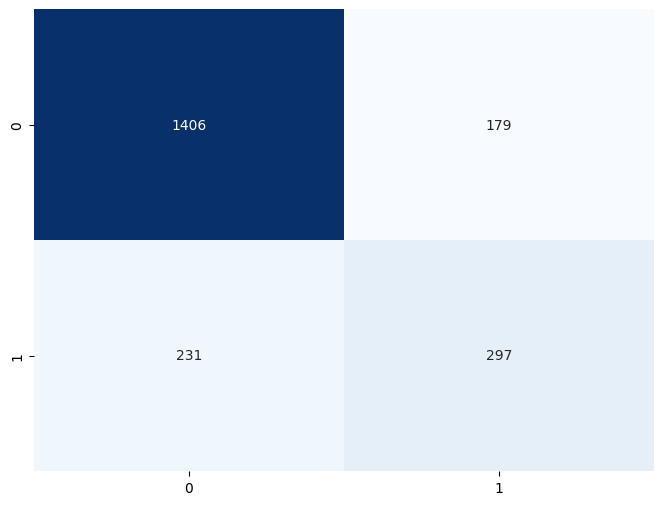

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)


Text(0.5, 1.0, 'Confusion Matrix')

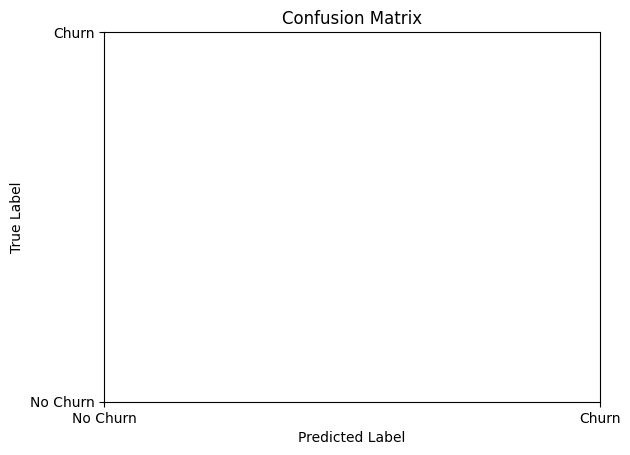

In [22]:
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.yticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')


In [23]:
plt.show()